# Imports

In [1]:
import os

import librosa
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from scipy.io import wavfile
import scipy.stats as stats
import re

# Extract MFCCs

In [13]:
def extract_MFCCs(files):
    data_list = []
    print("Extracting features...")
    for i, file in enumerate(files):
        if file.endswith('.wav'):
            file_path = os.path.join(current_path,"MLS", "Full_split", file)
            audio_data, sample_rate = librosa.load(file_path)
            mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate)
            mfccs_mean = list(np.mean(mfccs.T, axis= 0))
        
            file_path = os.path.join(current_path,"MLS", "Full_split", file)
            splited_file = file.split('_')
            if data_dict[int(splited_file[0])] == 'F':
                gender = 0
            if data_dict[int(splited_file[0])] == 'M': 
                gender = 1
        
        sample_features = [str(file), mfccs_mean, gender]
        data_list.append(sample_features)
        
        print(f"\r{i/len(files)*100:.3f}% complete",end='')
    # print(f"{i/len(files)*100} percent complete")
    print("\nMFCCs features extracted successfully")
    return data_list

In [15]:
current_path = os.getcwd()
file_path = os.path.join(current_path,"MLS", "Full_split")
audio_files = os.listdir(file_path)
data_list = extract_MFCCs(audio_files)
df = pd.DataFrame(data_list, columns = ['FileName', 'MFCCs', 'Gender'])
df.to_csv('data/MSL_split_MFCCs_data.csv', index=False)

Extracting features...
10.706% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1544
  warnings.warn(


27.295% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=882
  warnings.warn(


27.498% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(


31.630% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=441
  warnings.warn(


35.131% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1985
  warnings.warn(


37.248% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=221
  warnings.warn(


43.232% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(


53.063% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/librosa/core/spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1764
  warnings.warn(


99.980% complete
MFCCs features extracted successfully


In [16]:
def get_features(frequencies):

  nobs, minmax, mean, variance, skew, kurtosis =  stats.describe(frequencies)
  median   = np.median(frequencies)
  mode     = stats.mode(frequencies).mode[0]
  std      = np.std(frequencies)
  low,peak = minmax
  q75,q25  = np.percentile(frequencies, [75 ,25])
  iqr      = q75 - q25
  return nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr

In [18]:
df = pd.read_csv('data/MSL_split_MFCCs_data.csv')
df.head()

,FileName,MFCCs,Gender
0,12626_10229_000011.wav_4.wav,"[-352.51138, 139.03687, 23.040815, 41.163513, ...",1
1,7925_6390_000089.wav_4.wav,"[-446.45157, 68.63579, -36.33435, 39.582474, -...",0
2,12114_10229_000087.wav_0.wav,"[-419.787, 117.51201, 9.714027, 18.61376, -12....",0
3,13063_13511_000043.wav_5.wav,"[-517.1197, 100.94612, 16.065489, 33.44698, -1...",1
4,13063_13511_000032.wav_4.wav,"[-408.4836, 132.35562, 31.253569, 23.219936, -...",1


In [19]:
import json
features_list = []
for i in range(len(df)):
    nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr = get_features(json.loads(df['MFCCs'][i]))
    data = [df['FileName'][i], nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr, df['Gender'][i]]
    features_list.append(data)
    print(f"\r{i/len(df)*100:.3f}% complete",end='')
df_final = pd.DataFrame(features_list, columns = ['FileName', 'nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 'Gender'])
df_final.to_csv('data/MLS_split_MFCCs_statistics_data.csv', index=False)


99.980% complete

# Extract frequency features

## Get metadata

In [10]:
current_path = os.getcwd()
source = os.path.join(current_path, "MLS", "Full_split")

metadata = pd.read_csv(source + "/metainfo.csv")
data = metadata[['SPEAKER','GENDER']]
data_dict = dict(zip(data.SPEAKER, data.GENDER))


## Example:

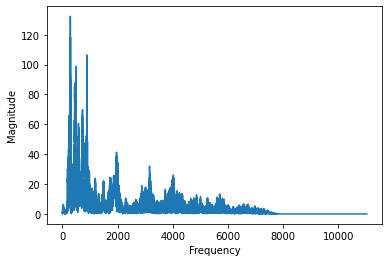

In [3]:
current_path = os.getcwd()
file_path = os.path.join(current_path,"MLS", "Full_split", "3050_2941_000000.wav_4.wav")
audio_data, sample_rate = librosa.load(file_path)
step = int(3200)
window_frequencies = []
top_freq = []

ft = np.fft.fft(audio_data)
magnitude = np.abs(ft)
frequency = np.linspace(0, sample_rate, len(magnitude))

plt.figure()
plt.plot(frequency[:int(len(frequency)/2)], magnitude[:int(len(frequency)/2)])
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()



## Extract features:

In [4]:
def get_frequencies(files):
    frequencies_list = []
    gender_list = []
    FileName_list = []
    print("Extracting frequencies...")
    for k, file in enumerate(files):
        if file.endswith('.wav'):
            file_path = os.path.join(current_path,"MLS", "Full_split", file)
            splited_file = file.split('_')
            if data_dict[int(splited_file[0])] == 'F':
                gender = 0
            if data_dict[int(splited_file[0])] == 'M': 
                gender = 1
            audio_data, sample_rate = librosa.load(file_path)

            step = int(3200) #3200 sampling points every 1/5 sec
            window_frequencies = []

            for i in range(0,len(audio_data),step):
                ft = np.fft.fft(audio_data[i:i+step]) #fft returns the list N complex numbers
                freqs = np.fft.fftfreq(len(ft)) #fftq tells you the frequencies associated with the coefficients
                imax = np.argmax(np.abs(ft))
                freq = freqs[imax]
                freq_in_hz = abs(freq *sample_rate)
                window_frequencies.append(freq_in_hz)
            FileName_list.append(file)
            gender_list.append(gender)
            frequencies_list.append(window_frequencies)
            print(f"\r{k/len(files)*100:.3f}% complete",end='')
    return frequencies_list, gender_list, FileName_list

In [5]:
def get_features(frequencies):

  nobs, minmax, mean, variance, skew, kurtosis =  stats.describe(frequencies)
  median   = np.median(frequencies)
  mode     = stats.mode(frequencies).mode[0]
  std      = np.std(frequencies)
  low,peak = minmax
  q75,q25  = np.percentile(frequencies, [75 ,25])
  iqr      = q75 - q25
  return nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr

In [6]:
current_path = os.getcwd()
file_path = os.path.join(current_path,"MLS", "Full_split")
audio_files = os.listdir(file_path)
frequencies, gender_list, FileName_list = get_frequencies(audio_files)
features_list = []
for i, frequency in enumerate(frequencies):
    nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr = get_features(frequency)
    features_list.append([FileName_list[i], nobs, mean, skew, kurtosis, median, mode, std, low, peak, q25, q75, iqr, gender_list[i]])
df = pd.DataFrame(features_list, columns = ['FileName', 'nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr', 'Gender'])
df.to_csv('data/MLS_Features_split_data.csv', index=False)

Extracting frequencies...
99.980% complete

/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
